1) Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stat
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
#Read the data
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


###EDA

In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
startups.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
#check for missing values
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
startups.shape

(50, 5)

###Renaming Columns to make it short

In [ ]:
startup= startups.rename({'R&D Spend':'RD_S', 'Administration':'Admin_S','Marketing Spend': 'MRKT_S'}, axis=1)
startup.head()

,RD_S,Admin_S,MRKT_S,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#independent and dependent variable
x(Independent) = dataset.iloc[ : , : -1].values  
[RD_s , Admin_s , MRK_S , State ]

y= dataset.iloc[: , -1].values   
[profit]               

##Visualization

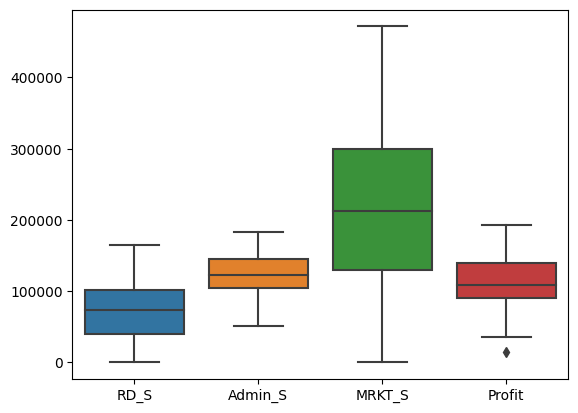

In [ ]:
sns.boxplot(data = startup)
plt.show()

from the above bloxplot we can say there are Outliers in the Profit i.e our Dependent Variable, but there are no Outliers in our Independent variable(dependent feature)

 We need to handle the outliers the best way possible, Sometimes just removing the outliers from the dataset can stop or reduce the skewness but that will lead to loss of our data since our dataset is small


Lets try to find the Outliers in the Profit Dependent Variable

[Transforming the variables can also eliminate the outliers as the transform variables reduces the variation caused by the extreme values]

In [ ]:
#to find the outlier in Profit

Q1 = np.quantile(startup.Profit,0.25)
Q3 = np.quantile(startup.Profit,0.75)
med = np.median(startup.Profit)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [ ]:
Outliers = startup.Profit[(startup.Profit <= lower_bound) | (startup.Profit >= upper_bound)]
print('The Outlier in the boxplot is', Outliers)

The Outlier in the boxplot is 49    14681.4
Name: Profit, dtype: float64


In [ ]:
startup.iloc[[49]]

,RD_S,Admin_S,MRKT_S,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Transformation

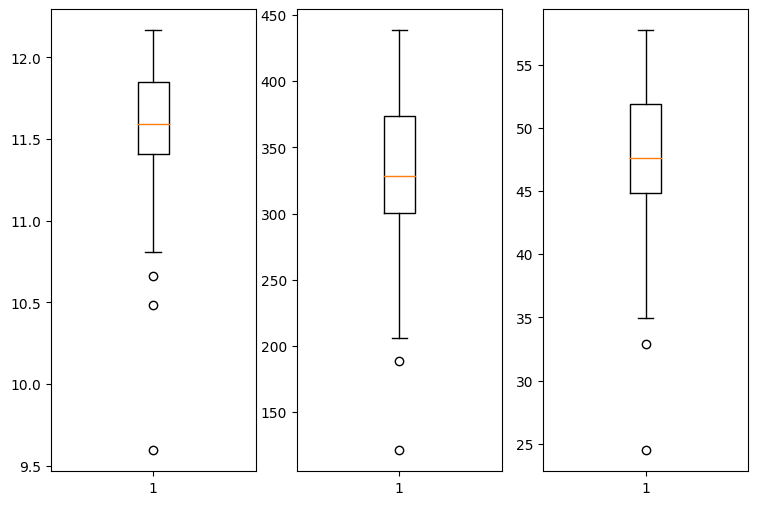

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(startup['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(startup['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(startup['Profit']))
plt.show()

Even after Transformation we cannot get rid of the Outlier, rather after transformation the number of outliers have increased


Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

R-squared measures the strength of the relationship between the model and the dependent variable on a 0 - 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

###Preapring Model

In [ ]:
model = smf.ols("Profit~RD_S+Admin_S+MRKT_S",data =startup).fit()


In [ ]:
# Calculating Values

print("Model Parameters\n" ,model.params,"\n")

#tvalues and pvalues
print("t values\n" ,model.tvalues)
print("P values\n" ,model.pvalues,"\n")

#R squared values
print("Rsquared Values :\n","r_squared value " , model.rsquared,"\n" , " r_squared_adj_value :",model.rsquared_adj,)

Model Parameters
 Intercept    50122.192990
RD_S             0.805715
Admin_S         -0.026816
MRKT_S           0.027228
dtype: float64 

t values
 Intercept     7.626218
RD_S         17.846374
Admin_S      -0.525507
MRKT_S        1.655077
dtype: float64
P values
 Intercept    1.057379e-09
RD_S         2.634968e-22
Admin_S      6.017551e-01
MRKT_S       1.047168e-01
dtype: float64 

Rsquared Values :
 r_squared value  0.9507459940683246 
  r_squared_adj_value : 0.9475337762901719


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        15:18:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_S           0.8057      0.045     17.846      0.000       0.715       0.897
Admin_S       -0.0268      0.051     -0.526      0.602      -0.130       0.076
MRKT_S         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Median Imputation to handle Outlier in Profit

In [ ]:
startup.Profit.median()

107978.19

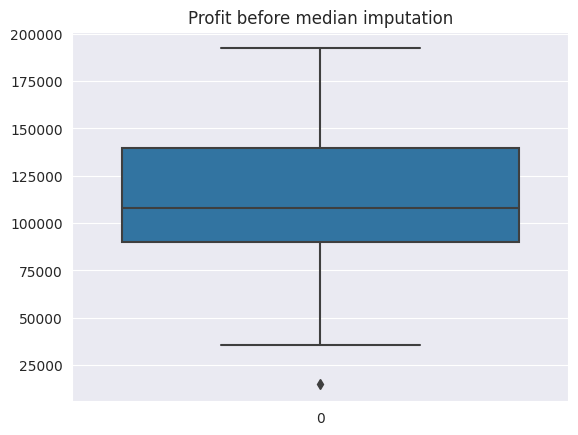

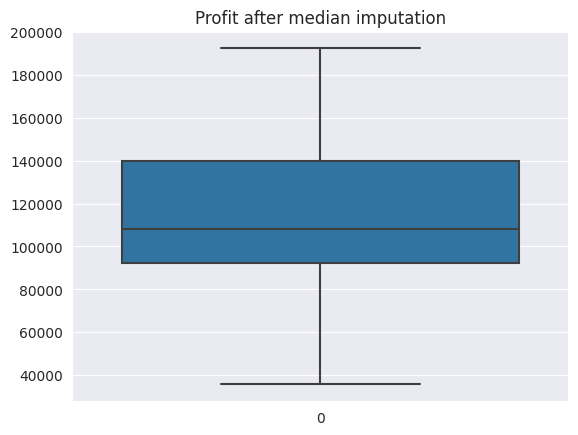

In [ ]:
df = startup.copy()
sns.boxplot(df['Profit'])
plt.title('Profit before median imputation')
plt.show()

for i in df['Profit']:
    q1 = np.quantile(df.Profit,0.25)
    q3 = np.quantile(df.Profit,0.75)
    med = np.median(df.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df['Profit'] = df['Profit'].replace(i, np.median(df['Profit']))
sns.boxplot(df['Profit'])
plt.title('Profit after median imputation')
plt.show()

###testing  our data in model and compare the R-squared with  Median imputation data model

In [ ]:
model_after_median_imputation = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = df).fit()
# Finding rsquared values
model_after_median_imputation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           5.06e-25
Time:                        15:26:53   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RD_S           0.7472      0.055     13.707      0.000       0.638       0.857
Admin_S       -0.0149      0.062     -0.242      0.810      -0.139       0.109
MRKT_S         0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the above result we can say median imputation the model is not performing well

###Mean Imputation to handle Outliers in Profit

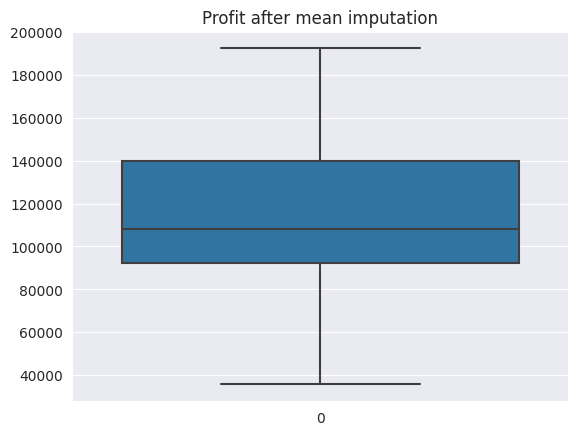

In [ ]:
df1 = df.copy()
for i in df1['Profit']:
    q1 = np.quantile(df1.Profit,0.25)
    q3 = np.quantile(df1.Profit,0.75)
    med = np.median(df1.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Profit'] = df1['Profit'].replace(i, np.mean(df1['Profit']))
sns.boxplot(df1['Profit'])
plt.title('Profit after mean imputation')
plt.show()

In [ ]:
#Let's test our data in model and compare the R-squared with Mean imputation data model

In [ ]:
model_after_mean_imputation = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = df1).fit()
# Finding rsquared values
model_after_mean_imputation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           5.06e-25
Time:                        15:33:55   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RD_S           0.7472      0.055     13.707      0.000       0.638       0.857
Admin_S       -0.0149      0.062     -0.242      0.810      -0.139       0.109
MRKT_S         0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 As you can see after mean imputation the model is not performing well it got a little worse than the median one

Now we have to try something else to get out better results than the raw data
The best thing we can do is now to remove the outlier and see the results

In [ ]:
data1 = startup.copy()
data1.drop([49], inplace = True)
data1

,RD_S,Admin_S,MRKT_S,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


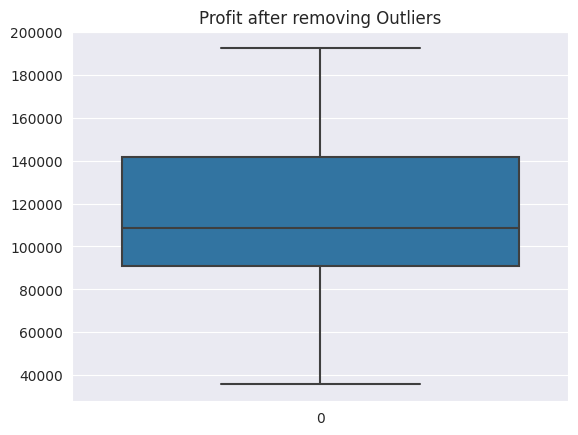

In [ ]:
sns.boxplot(data1.Profit)
plt.title('Profit after removing Outliers')
plt.show()

testing  our data in model and compare the R-squared with and without imputation data models

In [ ]:
model_after_removing_outlier = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = data1).fit()
# Finding rsquared values
model_after_removing_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           8.85e-32
Time:                        15:36:32   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_S           0.7830      0.038     20.470      0.000       0.706       0.860
Admin_S       -0.0222      0.043     -0.518      0.607      -0.109       0.064
MRKT_S         0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A Slightly better score than the other data models

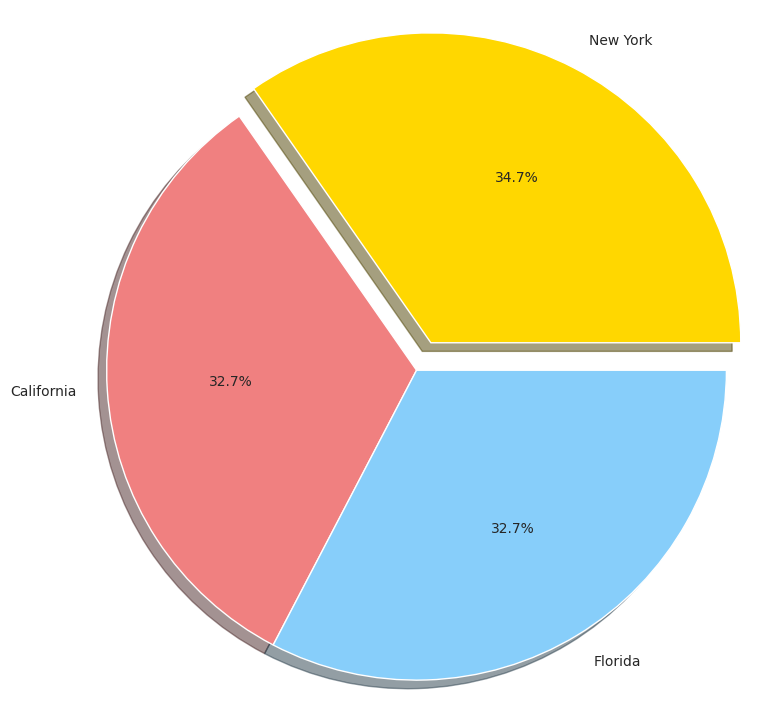

In [ ]:
plt.figure(figsize = (9,9))
labels = ['New York','California','Florida']
colors = ['gold','lightcoral','lightskyblue']
explode = (0.1,0,0)
plt.pie(x = data1['State'].value_counts(),labels = labels, explode = explode, colors = colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

In [ ]:
data1.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

In [ ]:
#Visualizing the Relation between each Independent Feature with respect to the Dependent Feature

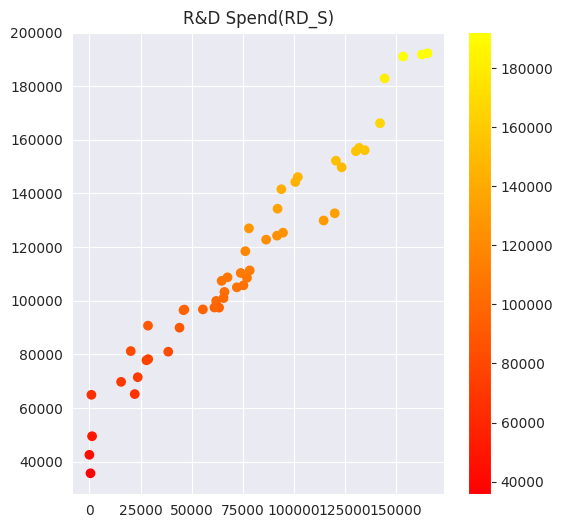

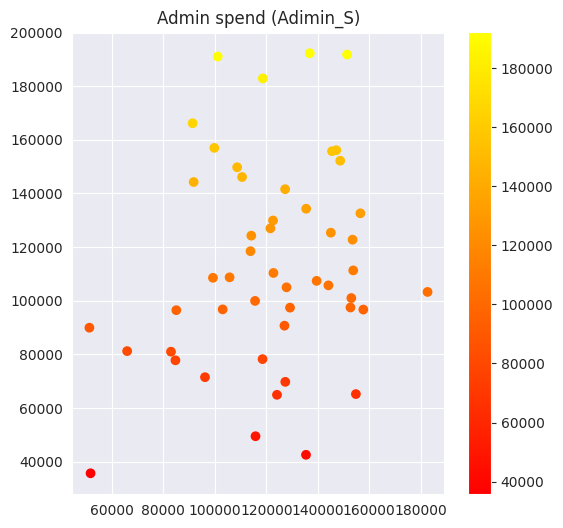

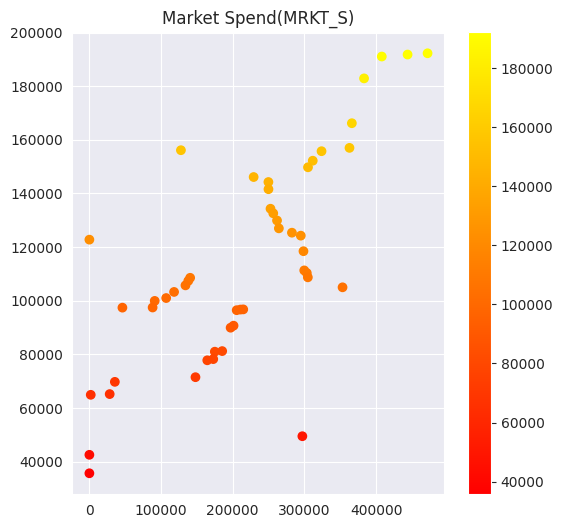

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(x = data1['RD_S'], y = data1['Profit'], c = data1['Profit'],cmap = 'autumn')
plt.title('R&D Spend(RD_S)')
plt.colorbar()
plt.show()

plt.figure(figsize = (6,6))
plt.scatter(x = data1['Admin_S'], y = data1['Profit'], c = data1['Profit'],cmap = 'autumn')
plt.title('Admin spend (Adimin_S)')
plt.colorbar()
plt.show()

plt.figure(figsize = (6,6))
plt.scatter(x = data1['MRKT_S'], y = data1['Profit'], c = data1['Profit'],cmap = 'autumn')
plt.title('Market Spend(MRKT_S)')
plt.colorbar()
plt.show()



RD_S feature has a good linear relation with Profit as compare to other features

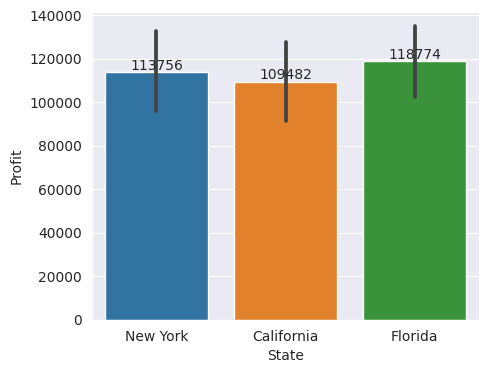

In [ ]:
plt.figure(figsize =(5,4))
ax = sns.barplot(x = "State", y = "Profit", data = data1)
for i in ax.containers:
    ax.bar_label(i, fmt = '%g')

There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation

In [ ]:
data2 = data1.copy()
data2 = data1.drop('State', axis = 1)
data2.head()

,RD_S,Admin_S,MRKT_S,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


###Correlation Matrix

In [ ]:
data2.corr()

,RD_S,Admin_S,MRKT_S,Profit
RD_S,1.000000,0.241955,0.724248,0.972900
Admin_S,0.241955,1.000000,-0.032154,0.200717
MRKT_S,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


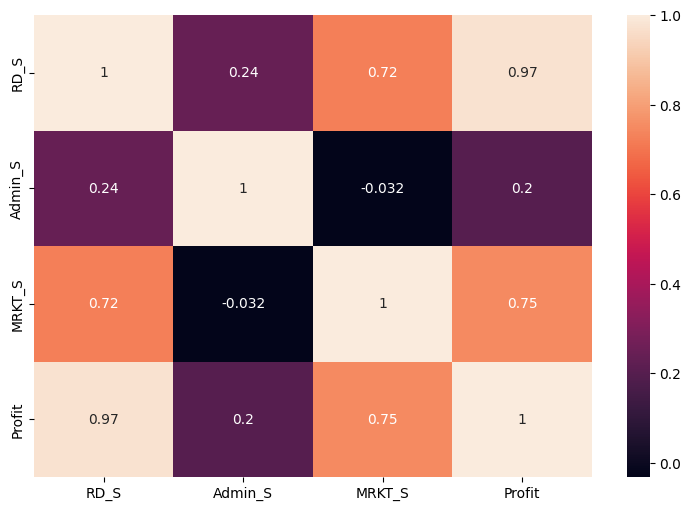

In [ ]:
plt.figure(figsize = (9,6))
sns.heatmap(data2.corr(), annot = True)
plt.show()

###Pairplot

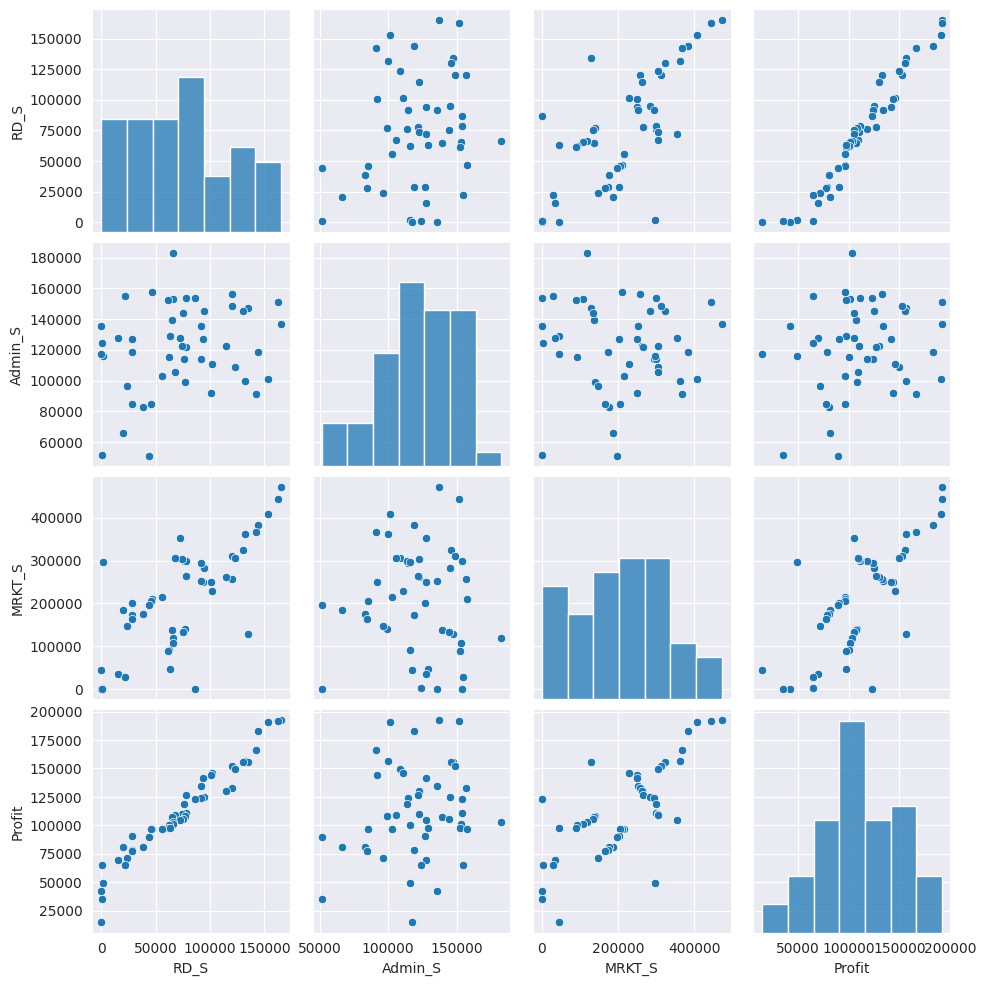

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data2)

RD_S has the highest score of correlation and the linear relation with Profit
Note: MRKT_S and RD_S also have a collinearity among themselves which will affect our model.


Feature Engineering
Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores


Applying Standard Scaler

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
x_scaled = x - mean/std_dev


However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data2.values)
scaled_features_df = pd.DataFrame(scaled_features, index = data2.index, columns = data2.columns)
scaled_features_df.head()

,RD_S,Admin_S,MRKT_S,Profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [ ]:
print(np.round(scaled_features_df.mean(),1),'\n',(np.round(scaled_features_df.std(),1)))

RD_S       0.0
Admin_S   -0.0
MRKT_S    -0.0
Profit    -0.0
dtype: float64 
 RD_S       1.0
Admin_S    1.0
MRKT_S     1.0
Profit     1.0
dtype: float64


For building Multi Linear Resgression there are assumption regarding the data set.

They are as follows:

Feature should be independent of each other there should'nt be any dependency upon each other

There shouldn't be any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)

Each Feature and Model Error (residuals) should be independent of each other

Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and should be independentally and identically distributed.

There should be a linear relation between the dependent variable and Independent variables

##Preparing a Model

In [ ]:
model1 = smf.ols("Profit~RD_S+Admin_S+MRKT_S", data = scaled_features_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           8.85e-32
Time:                        16:40:17   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.419e-16      0.029  -4.84e-15      1.000      -0.059       0.059
RD_S           0.9254      0.045     20.470      0.000       0.834       1.017
Admin_S       -0.0165      0.032     -0.518      0.607      -0.080       0.048
MRKT_S         0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Model Testing
As ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)

Finding Coefficient Parameters (Beta0 and Beta1's values)

In [ ]:
# Getting Coefficient Parameters
model1.params

Intercept   -1.419157e-16
RD_S         9.254411e-01
Admin_S     -1.646059e-02
MRKT_S       8.009988e-02
dtype: float64

Assupmtion for multi linear Regression fails

Feature should be independent of each other, there should'nt be any dependency upon each other

In [ ]:
#tvalues and pvalues
display(np.round(model1.tvalues,3), np.round(model1.pvalues,3))

Intercept    -0.000
RD_S         20.470
Admin_S      -0.518
MRKT_S        1.825
dtype: float64

Intercept    1.000
RD_S         0.000
Admin_S      0.607
MRKT_S       0.075
dtype: float64

Here, (Intercept) Beta0 p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypothesis as Beta1≠0 (Some or significant Slope)



========================================================================
------------------------------------------------------------------------
Observation:
(Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

(RD_S) Beta1: tvalue=20.470, pvalue= 0.000

(Admin_S) Beta2: tvalue=-0.518, pvalue= 0.607

(MRKT_S) Beta3: tvalue=1.825, pvalue= 0.075

If (pvalue=0)<(α=0.05); Reject Null hyp.
Thus, X(RD_S) variable has good slope and variance w.r.t Y(profit) variable.

If (pvalue=0)>(α=0.05); We fail to reject Null hyp.
Thus, X1(admin) and X2(marketing) variable doesn't have good slope
.

###compare models by their R-Squared and p_values

#####**For  Admin_S**

In [ ]:
model_admin = smf.ols("Profit~Admin_S", data = scaled_features_df).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Mon, 21 Aug 2023   Prob (F-statistic):              0.156
Time:                        16:51:47   Log-Likelihood:                -68.467
No. Observations:                  49   AIC:                             140.9
Df Residuals:                      47   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.143  -1.48e-15      1.000      -0.287       0.287
Admin_S        0.2058      0.143      1.442      0.156      -0.081       0.493
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#tvalues and pvalues
display(np.round(model_admin.tvalues,3), np.round(model_admin.pvalues,3))

Intercept   -0.000
Admin_S      1.442
dtype: float64

Intercept    1.000
Admin_S      0.156
dtype: float64

(Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

(Admin_S) Beta1: tvalue=1.442, pvalue= 0.156

If (pvalue=0)<(α=0.05); Reject Null hyp.

If (pvalue=0)>(α=0.05); We fail to reject Null hyp.

Thus, X(Admin_S) variable doesn't has good slope

#####**For  MRKT_S**

In [ ]:
model_mrkt = smf.ols("Profit~MRKT_S", data = scaled_features_df).fit()
model_mrkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.30e-09
Time:                        16:52:01   Log-Likelihood:                -50.150
No. Observations:                  49   AIC:                             104.3
Df Residuals:                      47   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.098  -2.15e-15      1.000      -0.198       0.198
MRKT_S         0.7393      0.098      7.527      0.000       0.542       0.937
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#tvalues and pvalues
display(np.round(model_mrkt.tvalues,3), np.round(model_mrkt.pvalues,3))

Intercept   -0.000
MRKT_S       7.527
dtype: float64

Intercept    1.0
MRKT_S       0.0
dtype: float64

Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

(marketing) Beta1: tvalue=7.527, pvalue= 0.0

If (pvalue=0)<(α=0.05); Reject Null hyp.
Thus, X(marketing) variable has good slope


If (pvalue=0)>(α=0.05); We fail to reject Null hypothesis

## if we combine admin and marketing feature to predict profit we should get a total R-sqaure value of 58% right?


In [ ]:
model_admin_plus_marketing= smf.ols('Profit~Admin_S+MRKT_S', data =scaled_features_df).fit()
# Finding rsquared values
model_admin_plus_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           6.59e-10
Time:                        17:00:33   Log-Likelihood:                -47.010
No. Observations:                  49   AIC:                             100.0
Df Residuals:                      46   BIC:                             105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.093  -2.27e-15      1.000      -0.187       0.187
Admin_S        0.2337      0.093      2.508      0.016       0.046       0.421
MRKT_S         0.7480      0.093      8.027      0.000       0.560       0.936
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To build two model in each model one of the feature will not be present and then we will come to an conclusion to remove the unnecessary feature by comparing the model parameter

In [ ]:
model_admin_plus_RD = smf.ols('Profit~RD_S+Admin_S', data= scaled_features_df).fit()
model_admin_plus_RD.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.69e-32
Time:                        17:05:22   Log-Likelihood:                 8.4042
No. Observations:                  49   AIC:                            -10.81
Df Residuals:                      46   BIC:                            -5.133
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.030  -7.03e-15      1.000      -0.060       0.060
RD_S           0.9868      0.031     31.847      0.000       0.924       1.049
Admin_S       -0.0344      0.031     -1.110      0.273      -0.097       0.028
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

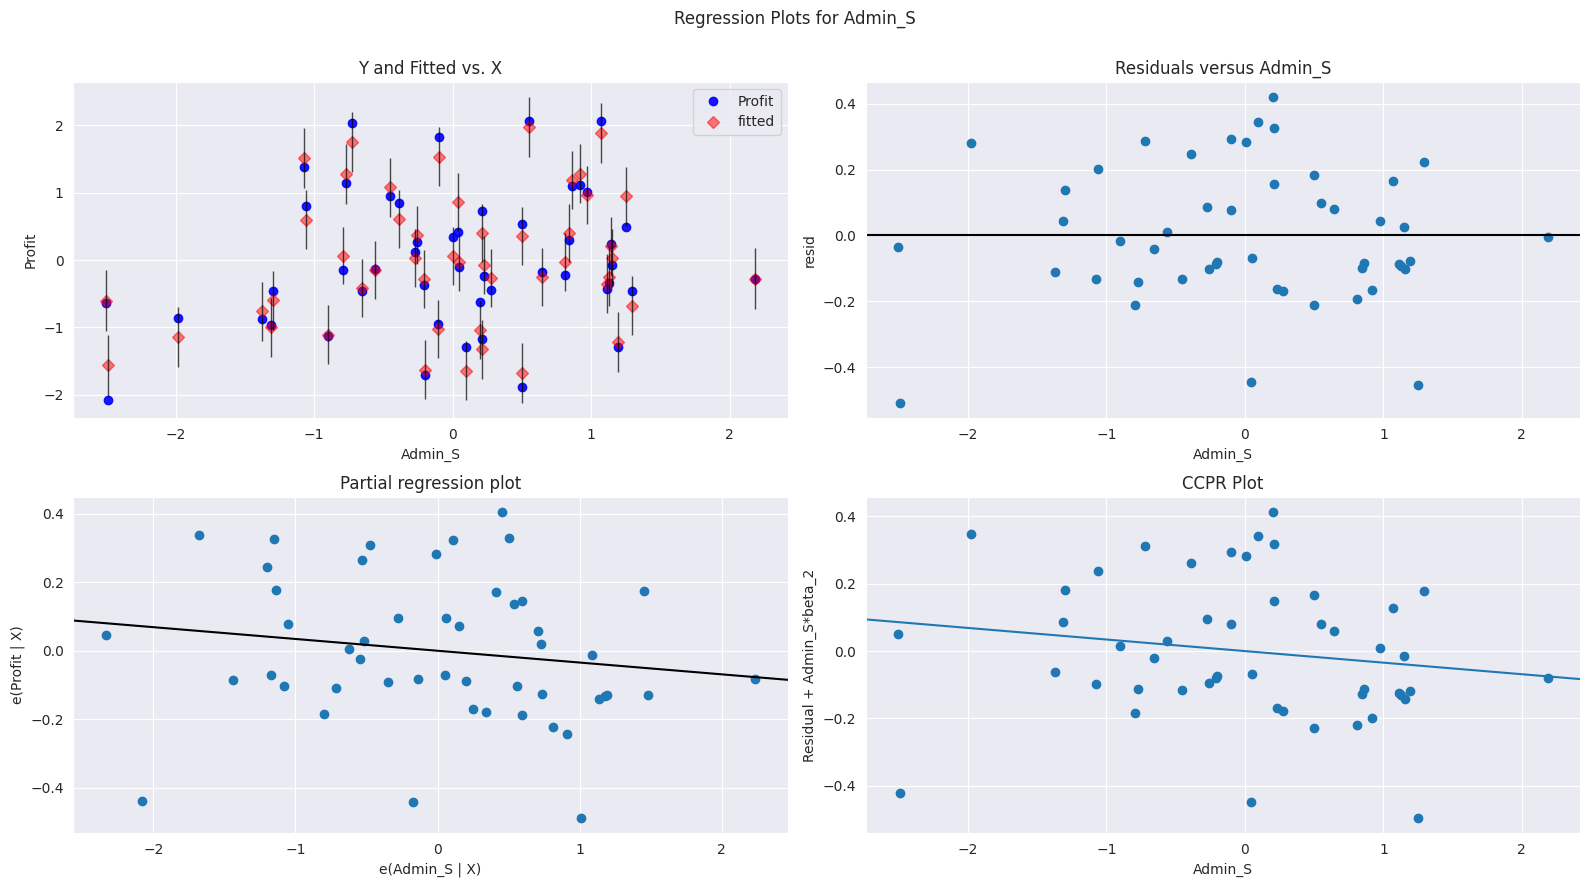

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_admin_plus_RD,'Admin_S', fig = fig)
plt.show()

In [ ]:
model_mrkt_plus_RD = smf.ols("Profit~RD_S+MRKT_S", data = scaled_features_df).fit()
model_mrkt_plus_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           3.74e-33
Time:                        17:22:09   Log-Likelihood:                 10.009
No. Observations:                  49   AIC:                            -14.02
Df Residuals:                      46   BIC:                            -8.342
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.029  -7.26e-15      1.000      -0.059       0.059
RD_S           0.9164      0.041     22.136      0.000       0.833       1.000
MRKT_S         0.0871      0.041      2.104      0.041       0.004       0.170
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

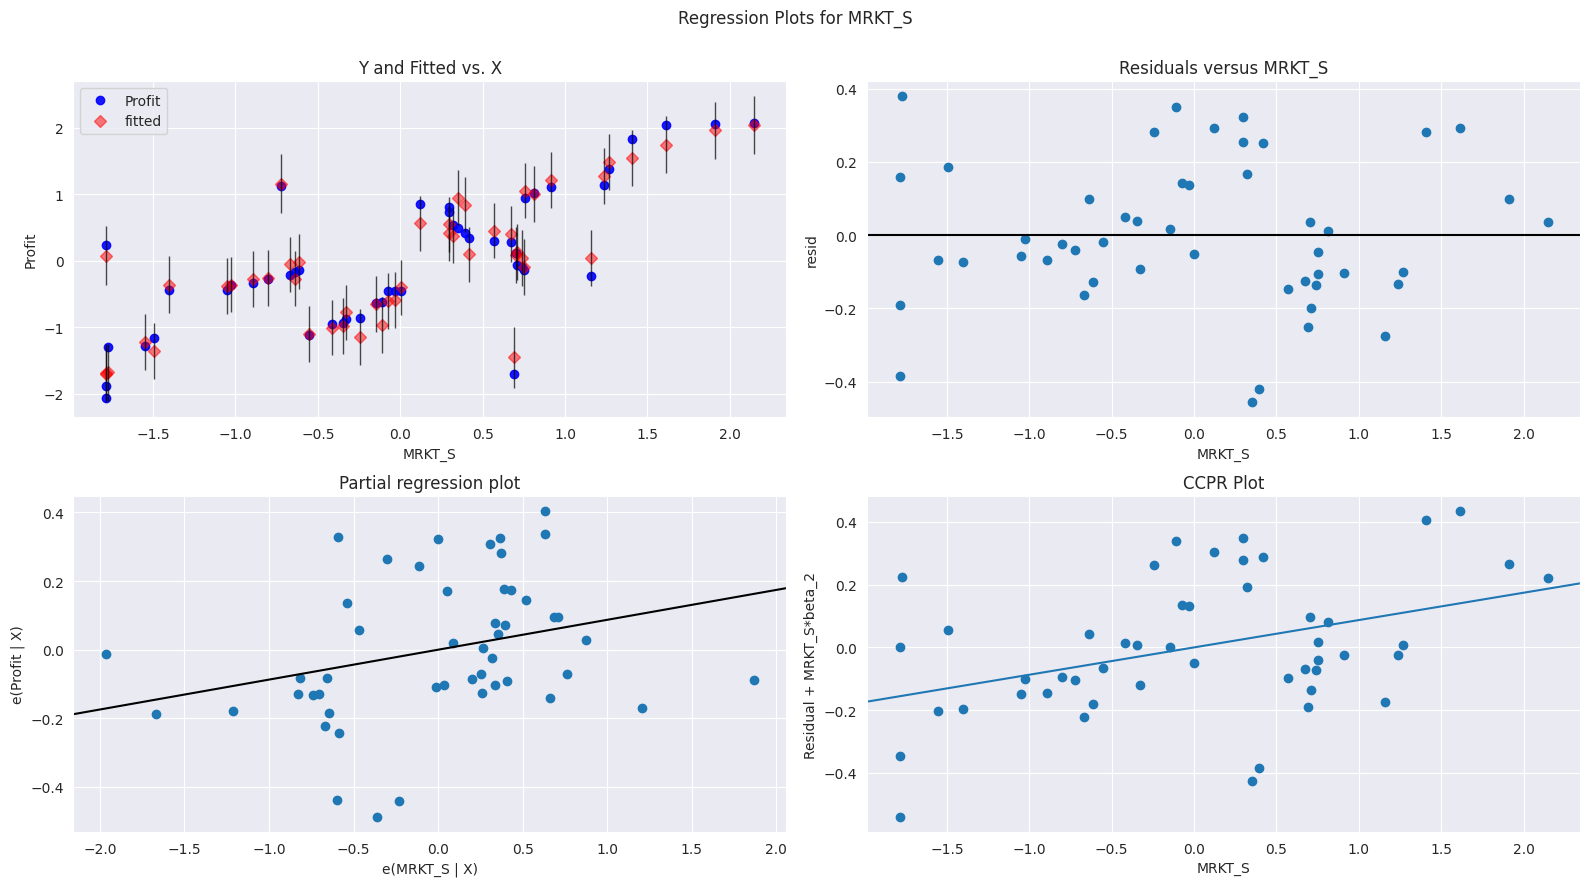

In [ ]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_mrkt_plus_RD,'MRKT_S', fig = fig)
plt.show()

In [ ]:
model_only_RD = smf.ols("Profit~RD_S", data = scaled_features_df).fit()
model_only_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           7.56e-34
Time:                        17:23:47   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.030  -7.01e-15      1.000      -0.061       0.061
RD_S           0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All our Assumptions are satisfied by the above model

Feature should be independent of each other there should'nt be any dependency upon each other

It is satisfied by the model using Marketing feature

While building a model using Marketing we got better results better AIC, BIC,

R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics

score by comparing it with the model in which Adminstration feature was used.

In [ ]:
#compare the residuals of both the models to come up with an conclusion

###Model Validation

Comparing different models with respect to their Root Mean Squared Errors

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model's predicted target value and the actual target value.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data2.columns

Index(['RD_S', 'Admin_S', 'MRKT_S', 'Profit'], dtype='object')

###Using all features

In [ ]:
x = data2.drop('Profit', axis = 1).values
y = data2.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x:  (49, 3)
Shape of y: (49, 1)
Shape of X_train:  (36, 3)
Shape of X_test:  (13, 3)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [ ]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9059814869956572
R2_score (train):  0.9650197585709105
R2_score (test):  0.9341582772336136
RMSE using all features:  8385.783571480788


**RD_S and MRKT_S Feature**

In [ ]:
x = data2.drop(['Profit','Admin_S'],axis=1).values
y = data2.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x:  (49, 2)
Shape of y: (49, 1)
Shape of X_train:  (36, 2)
Shape of X_test:  (13, 2)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [ ]:

from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [ ]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_rnd_and_marketing_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_rnd_and_marketing_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_RnD_and_marketing = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_and_marketing_train)
print('R2_score (test): ', r2_score_rnd_and_marketing_test)
print("RMSE using RnD and Marketing feature: ", rmse_linear_using_RnD_and_marketing)

CV:  0.9114070932851247
R2_score (train):  0.9643536571553787
R2_score (test):  0.939185037123506
RMSE using RnD and Marketing feature:  8059.317765282762


### **only RD_S feature**

In [ ]:
x = data2.iloc[:,:1].values
y = data2.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)


# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x:  (49, 1)
Shape of y: (49, 1)
Shape of X_train:  (36, 1)
Shape of X_test:  (13, 1)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear_using_rnd = LinearRegression()
regressor_linear_using_rnd.fit(x_train_scal, y_train_scal)

LinearRegression()

In [ ]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear_using_rnd, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear_using_rnd.predict(x_train_scal)
r2_score_rnd_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear_using_rnd.predict(x_test_scal)
r2_score_rnd_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE on Test set results
rmse_linear_using_only_RnD = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_train)
print('R2_score (test): ', r2_score_rnd_test)
print("RMSE using only RnD feature: ", rmse_linear_using_only_RnD)

CV:  0.8900789292733178
R2_score (train):  0.957733077239081
R2_score (test):  0.9521017609333128
RMSE using only RnD feature:  7152.417057875889


compare the Root Mean Squared Error and check for the minimum value

In [ ]:
rmse_linear_1 = rmse_linear_using_all_features
rmse_linear_2 = rmse_linear_using_RnD_and_marketing
rmse_linear_3 = rmse_linear_using_only_RnD


rmse_compare = {'Using All Features Model': rmse_linear_1,
                'Using RnD and Marketing Feature Model': rmse_linear_2,
                'Using only R&D Feauture Model': rmse_linear_3}
min(rmse_compare, key=rmse_compare.get)

'Using only R&D Feauture Model'

The Model that was build without using Administration and Marketing feature performed very well.

Scoring minimumn Root mean squared error and maximum R-squared and adjusted R-squared and highest linear relation

For further We are going to use the model which was build by using only R&D feature

#####**For  RD_S**

In [ ]:
finalmodel_rd = smf.ols("Profit~RD_S", data = scaled_features_df).fit()
finalmodel_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           7.56e-34
Time:                        17:48:03   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.113e-16      0.030  -7.01e-15      1.000      -0.061       0.061
RD_S           0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

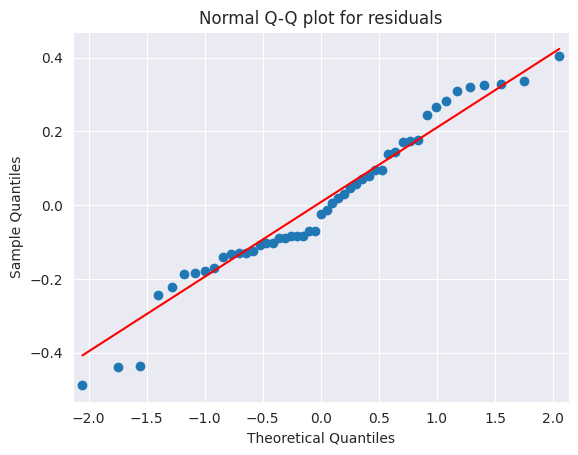

In [ ]:
# Residual values = y - yhat
sm.qqplot(finalmodel_rd.resid, line = 'q')
plt.title("Normal Q-Q plot for residuals")
plt.show()

 Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

##Residual plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

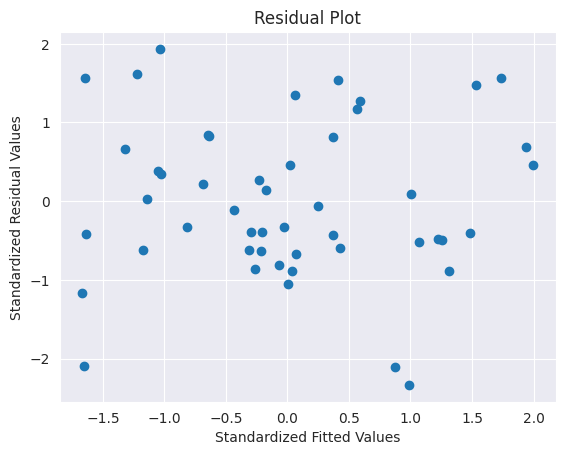

In [ ]:
plt.scatter(get_standardized_values(finalmodel_rd.fittedvalues), get_standardized_values(finalmodel_rd.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Constant Variance (Homoscedasticity) in Error

## **Residual VS Regressors**

Plotting to visualize the partial relation of each independent features with the Dependent variable and errors

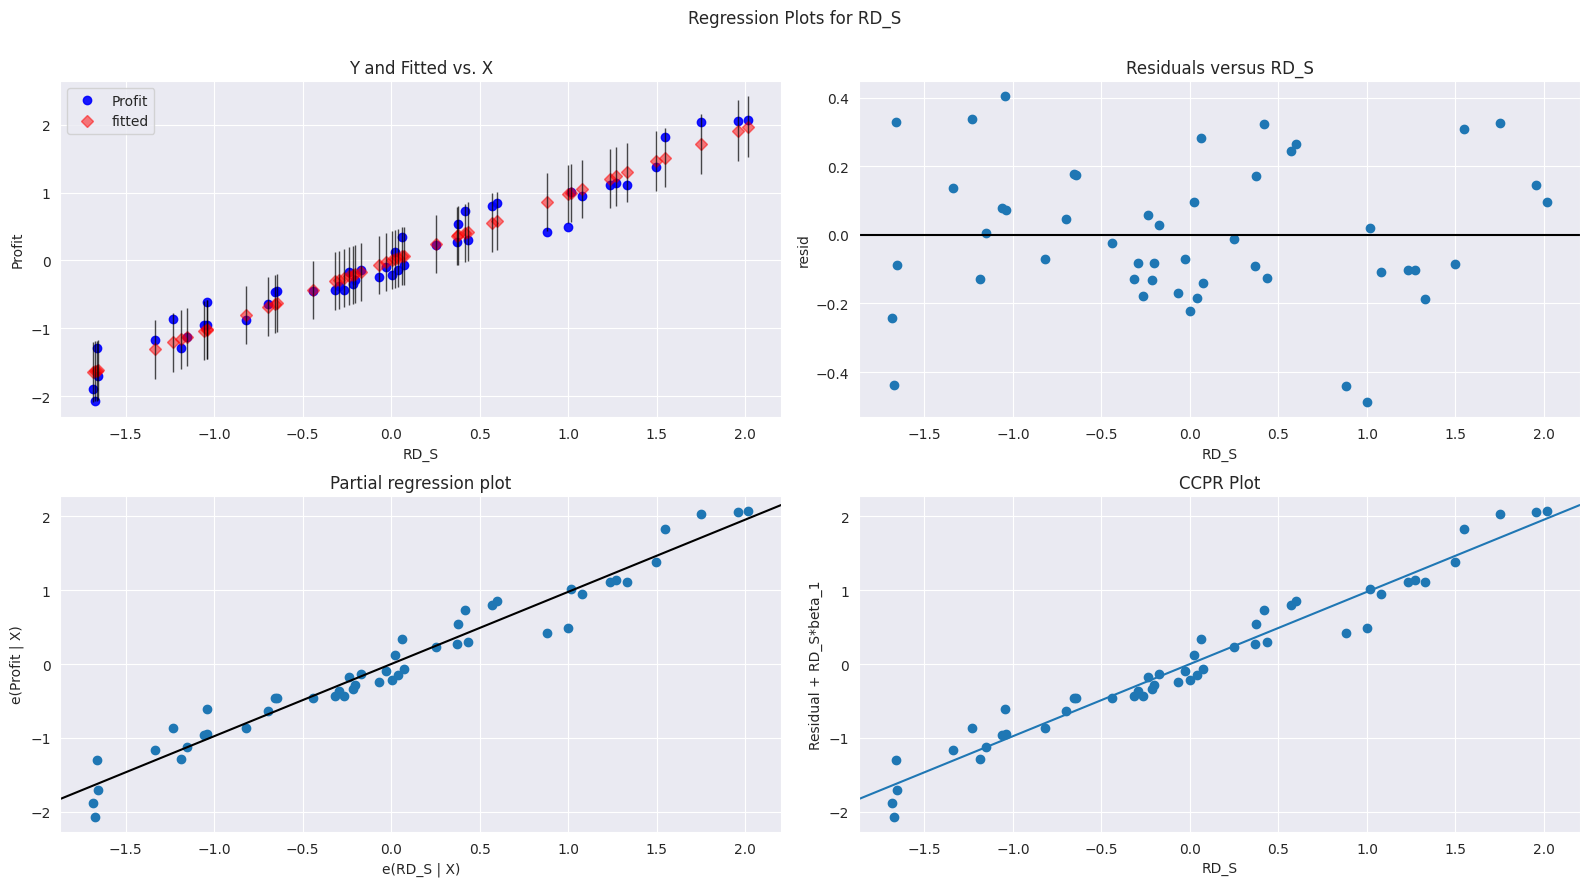

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_RD = sm.graphics.plot_regress_exog(finalmodel_rd,'RD_S', fig=fig)
plt.show()

Each Feature and Model Error (residuals) should be independent of each other

There should be a linear relation between the dependent variable and Independent variables

All our assumptions are satisfied. Hence, we can say our model is a good model let us test more to make it even better

## **Detecting Influencers/Outliers in the Model**

### Cook's Distance

In [ ]:
influence_points=finalmodel_rd.get_influence()
c, p_value=influence_points.cooks_distance

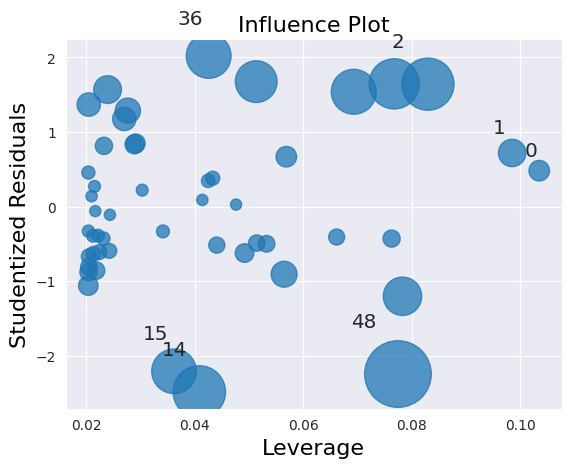

In [ ]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(finalmodel_rd)
plt.show()

In [ ]:
#Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints


k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


plot the influencers and also plot a cut off line using the stem plot

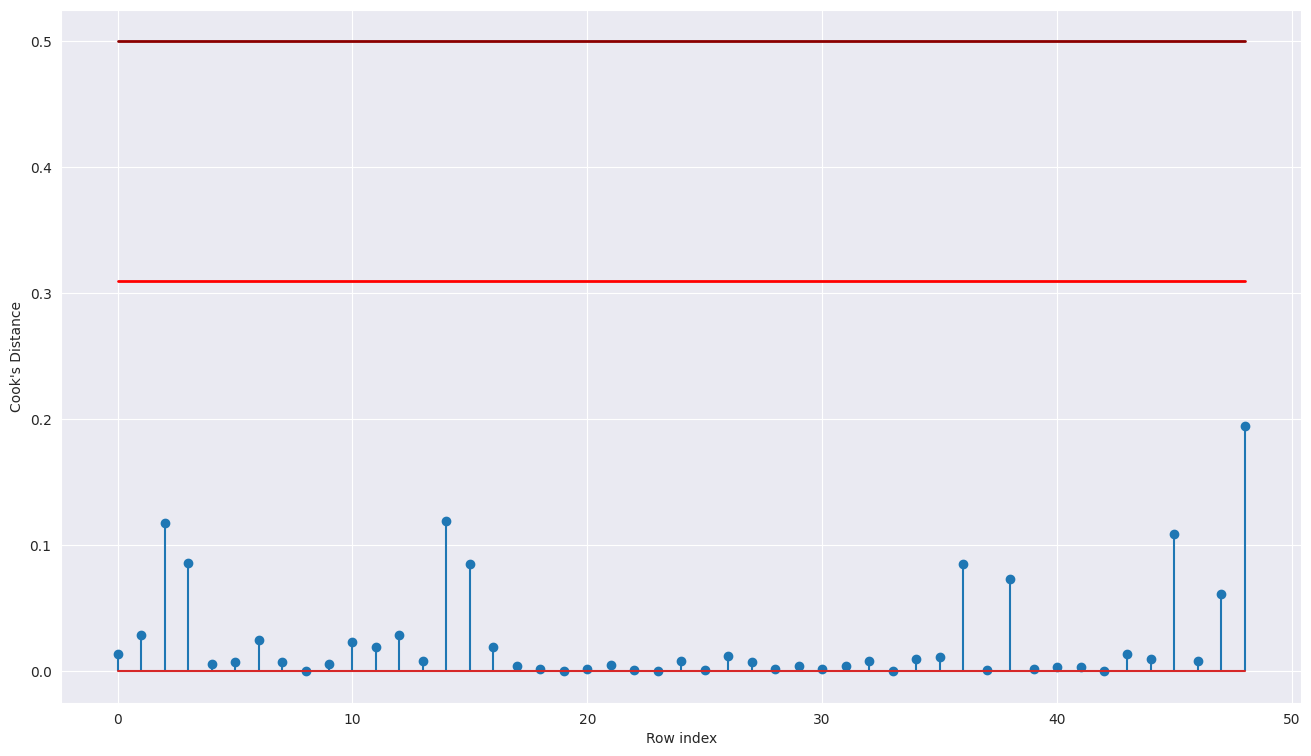

In [ ]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

All the points are below our cut-off line
Hence, we can say that there are no influncers present in our model we can proceed with the predictions

### **Predicting values (from Model using same dataset)**

In [ ]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(data2.values.reshape(-1,1))

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

prediction_unscaled = transformer_y.inverse_transform(prediction)
predicted = pd.DataFrame(prediction_unscaled, columns=['Predicted_Profit'])
predicted['Profit'] = data2.Profit
predicted['RD_S'] = data2.RD_S
predicted

,Predicted_Profit,Profit,RD_S
0,188741.633166,192261.83,165349.20
1,165165.693431,191792.06,162597.70
2,442665.543246,191050.39,153441.51
3,211042.488062,182901.99,144372.41
4,186461.632949,166187.94,142107.34
...,...,...,...
191,86993.489143,NaN,NaN
192,52176.000671,NaN,NaN
193,94603.229137,NaN,NaN
194,51726.836899,NaN,NaN


R^2 value for each prepared model

In [ ]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Using All Features Model','Using RnD and Marketing Feature Model','Using only R&D Feauture Model'],
        'R_squared':[model.rsquared,model_after_median_imputation.rsquared,model_after_mean_imputation.rsquared,model_after_removing_outlier.rsquared,r2_score_all_feature_train,r2_score_rnd_and_marketing_train,r2_score_rnd_train],
        'R_squared_adjusted':[model.rsquared_adj,model_after_median_imputation.rsquared_adj,model_after_mean_imputation.rsquared_adj,model_after_removing_outlier.rsquared_adj,model.rsquared_adj,model_mrkt.rsquared_adj,model_only_RD.rsquared_adj],
       'RMSE':[np.sqrt(model.mse_resid),np.sqrt(model_after_median_imputation.mse_resid),np.sqrt(model_after_mean_imputation.mse_resid),np.sqrt(model_after_removing_outlier.mse_resid),rmse_linear_using_all_features,rmse_linear_using_RnD_and_marketing,rmse_linear_using_only_RnD]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.918296,0.912967,11148.345424
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Using All Features Model,0.965020,0.947534,8385.783571
5,Using RnD and Marketing Feature Model,0.964354,0.536927,8059.317765
6,Using only R&D Feauture Model,0.957733,0.956432,7152.417058


Visualizing Models Performance

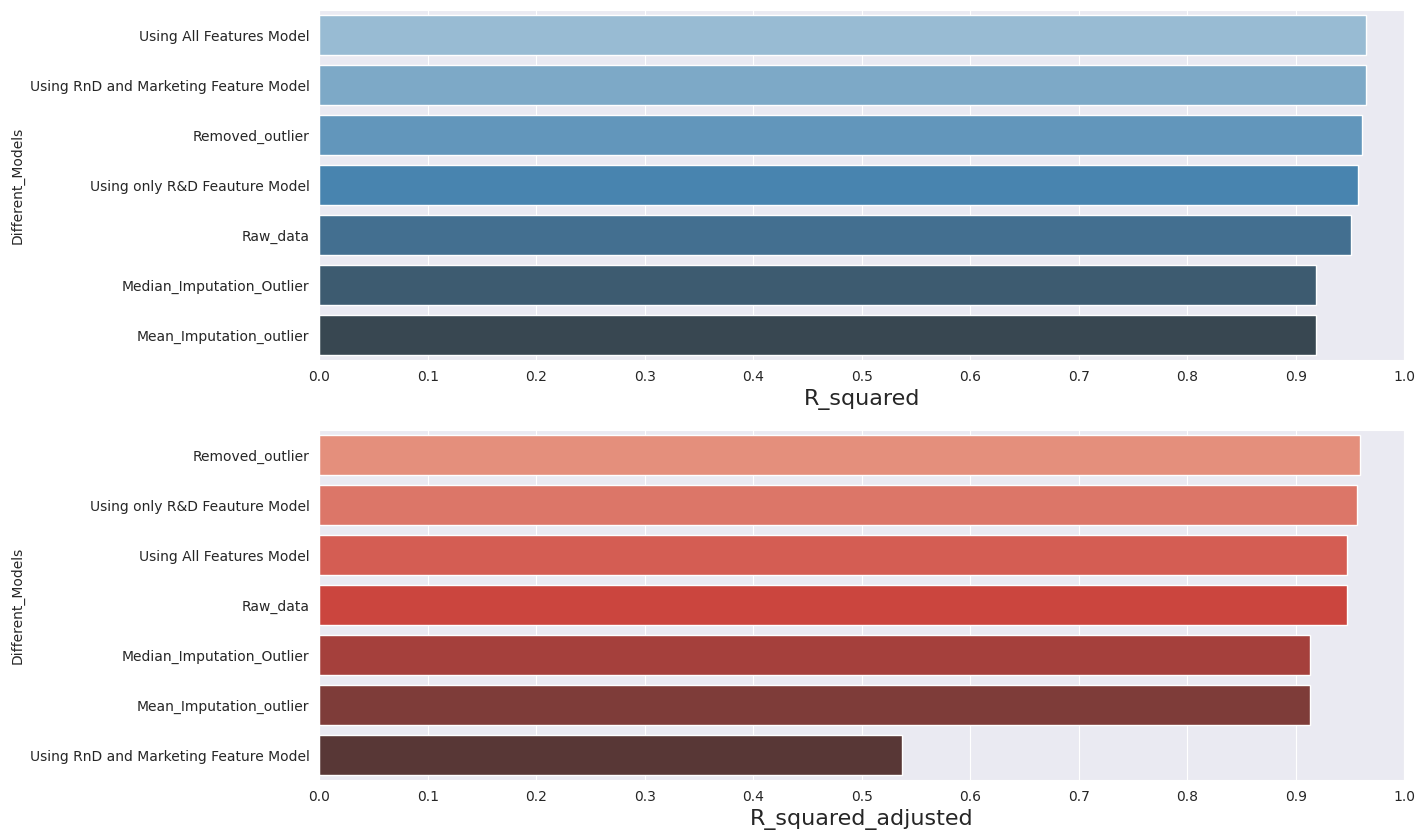

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

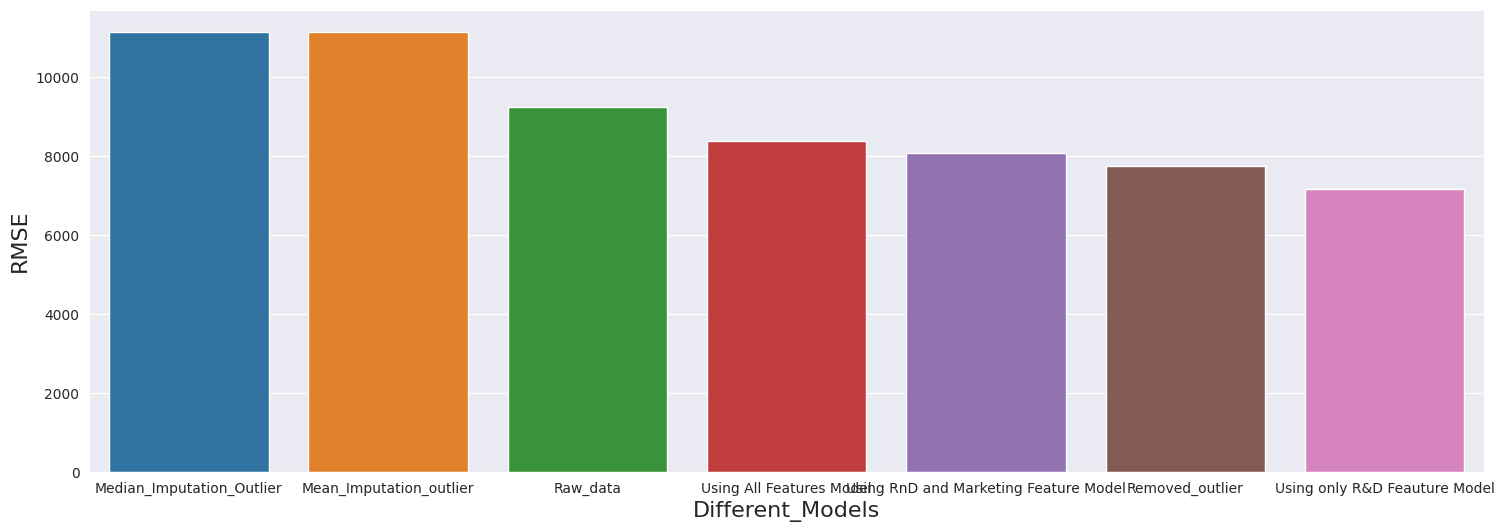

In [ ]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()